# Import Library

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

import seaborn as sns

import folium

Tahap Ini adalah import library yang dibutuhkan pada program

# Data preprocessing

In [4]:
df_lon = pd.read_csv('dataset/london_crime.csv')

Cell ini digunakan untuk mengambil dataset yang tersimpan pada folder dataset

In [5]:
df_lon

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [6]:
df_lon['borough']

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
               ...    
13490599         Brent
13490600    Hillingdon
13490601        Sutton
13490602       Croydon
13490603        Merton
Name: borough, Length: 13490604, dtype: object

In [7]:
df_lon.set_index('year', inplace=True)

In [8]:
df_lon.head(10)

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2016,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,11
2016,E01001646,Greenwich,Violence Against the Person,Other violence,0,11
2015,E01000677,Bromley,Violence Against the Person,Other violence,0,5
2016,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,3
2008,E01004563,Wandsworth,Robbery,Personal Property,0,6
2012,E01001320,Ealing,Theft and Handling,Other Theft,0,5
2010,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,7
2013,E01002633,Hounslow,Robbery,Personal Property,0,4
2013,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,9


In [9]:
df_lon.tail(10)

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2008,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2
2012,E01001144,Croydon,Violence Against the Person,Harassment,0,1
2010,E01000655,Bromley,Theft and Handling,Theft From Shops,0,7
2014,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,10
2012,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2
2015,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2
2015,E01002504,Hillingdon,Robbery,Personal Property,1,6
2011,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2
2011,E01001134,Croydon,Robbery,Business Property,0,5


In [10]:
df_lon.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
month             0
dtype: int64

Data pada file CSV tidak memiliki nilai yang kosong dan siap di plot dan analisis

# Visualisasi Data

## What is the change in the number of crime incidents from 2011 to 2016?

In [11]:
df_lon.sort_values(['year'], ascending=False, axis=0, inplace=True)

Cell ini berguna untuk sort values 'year' pada variable df_lon

In [12]:
df_lon

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2016,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,11
2016,E01001974,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,11
2016,E01004251,Tower Hamlets,Theft and Handling,Other Theft,1,9
2016,E01002268,Havering,Violence Against the Person,Other violence,0,6
2016,E01000063,Barking and Dagenham,Violence Against the Person,Harassment,1,9
...,...,...,...,...,...,...
2008,E01000498,Brent,Theft and Handling,Other Theft Person,0,3
2008,E01003855,Richmond upon Thames,Violence Against the Person,Other violence,0,4
2008,E01000473,Brent,Drugs,Drug Trafficking,0,12


In [13]:
df_lon.loc[2016:2011]

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2016,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,11
2016,E01001974,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,11
2016,E01004251,Tower Hamlets,Theft and Handling,Other Theft,1,9
2016,E01002268,Havering,Violence Against the Person,Other violence,0,6
2016,E01000063,Barking and Dagenham,Violence Against the Person,Harassment,1,9
...,...,...,...,...,...,...
2011,E01003689,Redbridge,Theft and Handling,Theft From Motor Vehicle,6,8
2011,E01001227,Ealing,Fraud or Forgery,Counted per Victim,0,8
2011,E01000838,Bromley,Theft and Handling,Theft From Shops,0,11


cell ini berguna untuk mencetak dataframe london dari 2016 sampe 2011

In [14]:
df_chg = df_lon.loc[2016:2011]
df_chg = df_chg.groupby('year')['value'].sum()
df_chg

year
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

cell ini berguna untuk mendefinisikan variable datafarme london 2016 sampe 2011 dan juga groupby berdasarkan year dan value

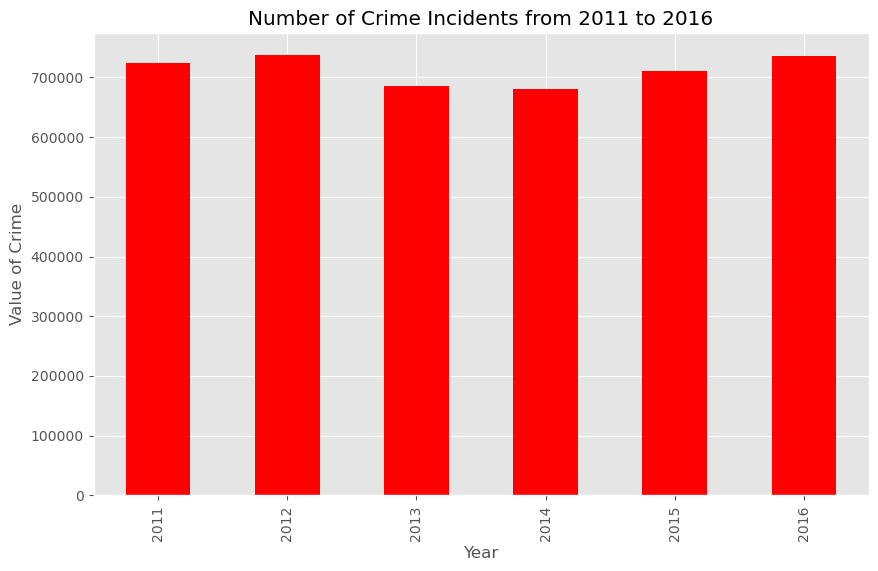

In [15]:
df_chg.plot(kind='bar',figsize=(10,6),color='red')

plt.xlabel('Year')
plt.ylabel('Value of Crime')
plt.title('Number of Crime Incidents from 2011 to 2016')

plt.show()

Crime incident yang terjadi dari rentang waktu 2011 sampai 2016 cukup tinggi,dari plot ini menunjukan bahwa pada tahun 2012 kejadian kriminal di London cukup tinggi hampir sama dengan 2016.

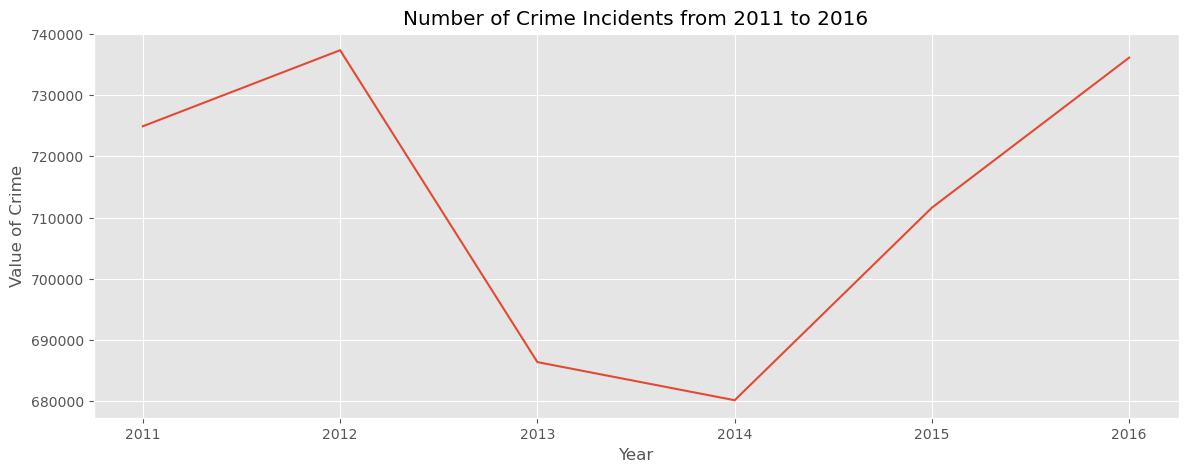

In [16]:
df_chg.plot(kind='line',figsize=(14,5))


plt.xlabel('Year')
plt.ylabel('Value of Crime')
plt.title('Number of Crime Incidents from 2011 to 2016')


plt.show()

Crime incident yang terjadi antara 2011 sampai 2016 bisa ditampilkan melalui line plot,bisa dilihat pada tahun 2012 kejahatan yang tinggi turun drastis pada 2013 dan 2014, lalu meroket tinggi kembali pada tahun 2016

# What were the top 5 crimes per borough in 2011?

In [17]:
df_lon.sort_values(['value'], ascending=False, axis=0, inplace=True)

df_2011 = df_lon.loc[2011,['borough','value']]

df_2011 = df_2011.groupby('borough')['value'].sum().reset_index()

df_2011.set_index('borough', inplace=True)
df_2011

,value
borough,
Barking and Dagenham,16686
Barnet,24007
Bexley,11325
Brent,27669
Bromley,19868
Camden,33956
City of London,69
Croydon,29830
Ealing,29537


cell ini berguna untuk mendefinisikan variable dataframe london pada tahun 2011 dan juga groupby berdasarkan borough dan value

In [18]:
df_2011.sort_values(['value'], ascending=False, axis=0, inplace=True)
df_2011 = df_2011.head(5)

cell ini berguna untuk sort value secara ascending dan mencetak 5 head

In [19]:
df_2011

,value
borough,
Westminster,54243
Camden,33956
Lambeth,33224
Southwark,30723
Croydon,29830


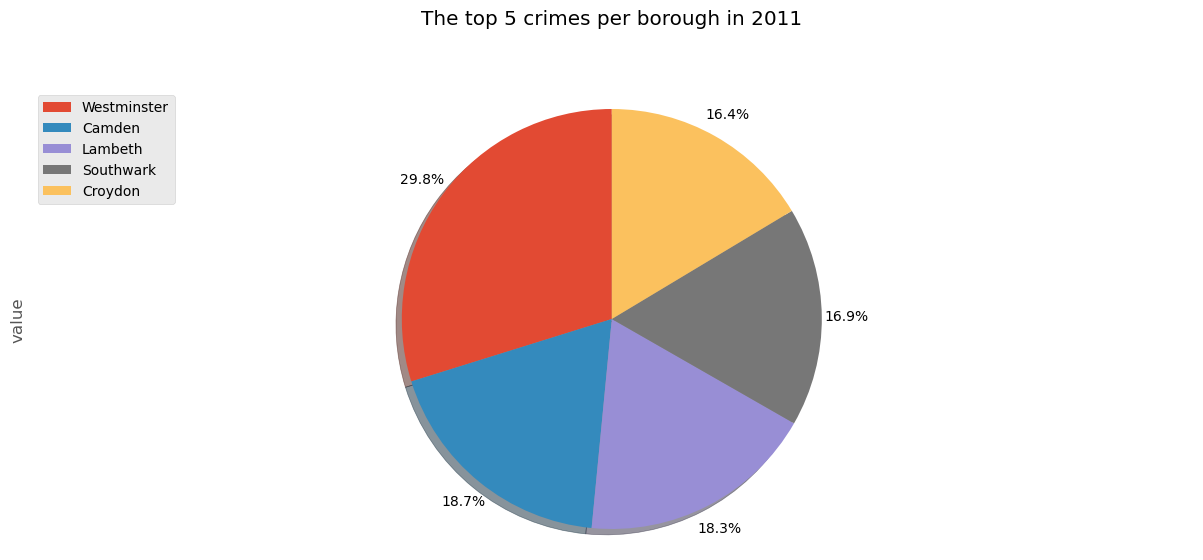

In [20]:
df_2011['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('The top 5 crimes per borough in 2011', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_2011.index, loc='upper left') 

plt.show()

Crime Incident yang terjadi di London pada tahun 2011 terhitung cukup tinggi, yang dimana westminster paling tinggi dengan 29,8% kejahatan.

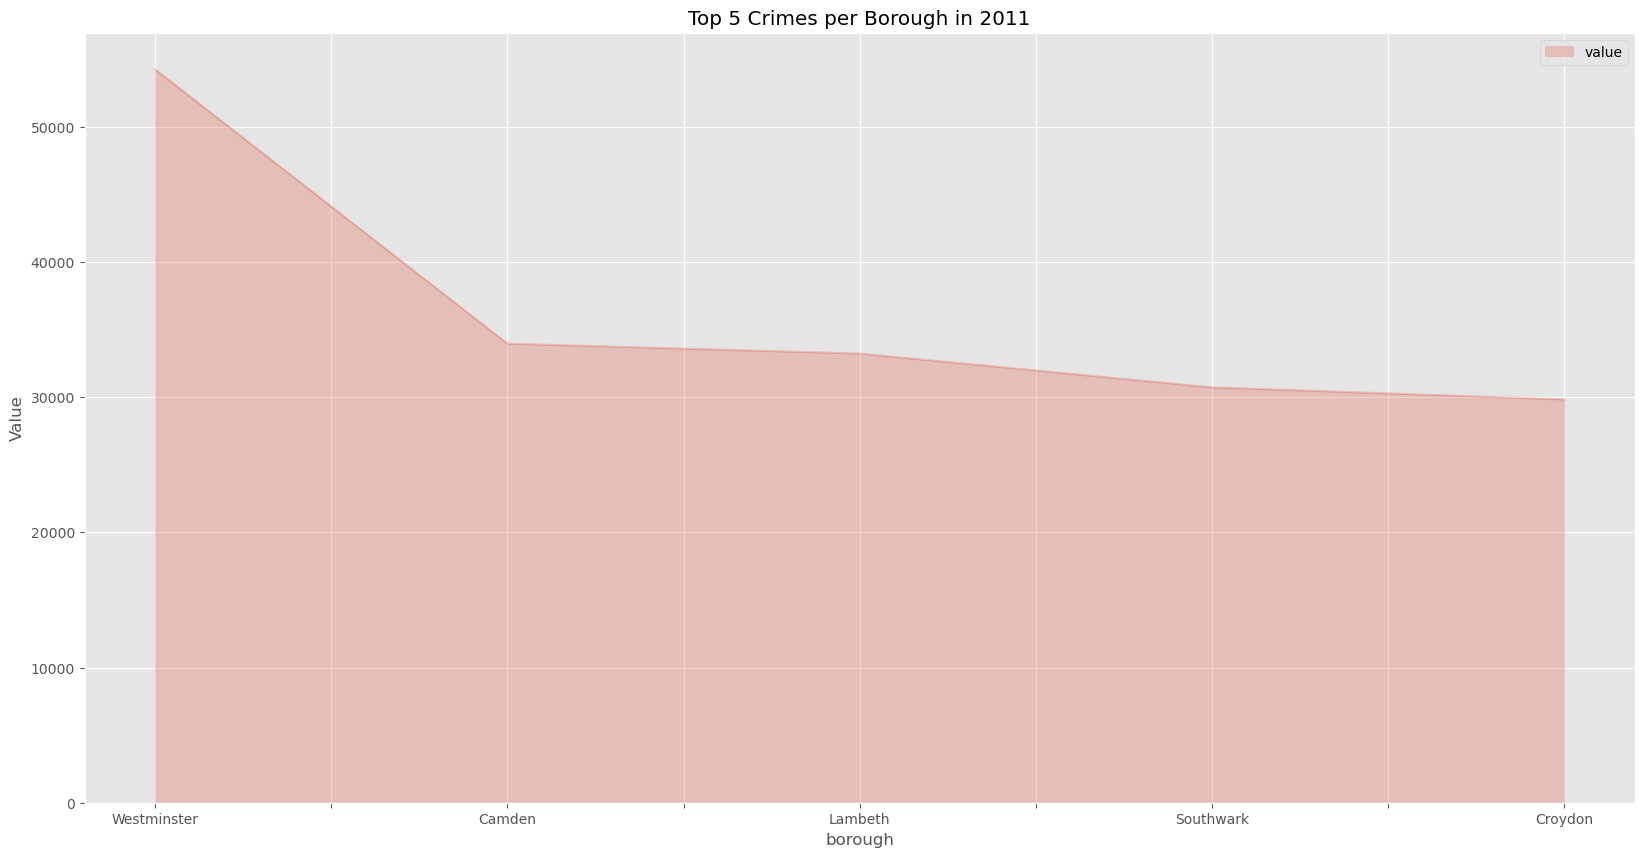

In [21]:
df_2011.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Top 5 Crimes per Borough in 2011')
plt.ylabel('Value')

plt.show()


Crime Incident yang terjadi di London pada tahun 2011 terhitung cukup tinggi, yang dimana westminster paling tinggi dengan mencapai lebih dari 50000 kejadian

# What is the crime count in Westminster from 2008 to 2016?

In [22]:
df_wm = df_lon[df_lon['borough']=='Westminster']

cell ini berguna untuk mendefinisikan variable baru yang dimana akan mengambil value westminster dari borough

In [23]:
df_wm

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2008,E01004734,Westminster,Theft and Handling,Other Theft,300,3
2008,E01004734,Westminster,Theft and Handling,Other Theft,288,11
2008,E01004734,Westminster,Theft and Handling,Other Theft,286,12
2009,E01004734,Westminster,Theft and Handling,Other Theft,281,1
2011,E01033595,Westminster,Theft and Handling,Other Theft,280,12
...,...,...,...,...,...,...
2013,E01004728,Westminster,Violence Against the Person,Other violence,0,12
2013,E01004743,Westminster,Other Notifiable Offences,Going Equipped,0,6
2013,E01004707,Westminster,Drugs,Possession Of Drugs,0,12


In [24]:
df_wm = df_wm.groupby(['year', 'borough'])['value'].sum().reset_index()

In [25]:
df_wm

,year,borough,value
0,2008,Westminster,47846
1,2009,Westminster,48456
2,2010,Westminster,48116
3,2011,Westminster,54243
4,2012,Westminster,59226
5,2013,Westminster,53852
6,2014,Westminster,47564
7,2015,Westminster,47395
8,2016,Westminster,48330


In [26]:
df_wm.set_index('year', inplace=True)

cell ini berguna untuk membuat year menjadi index

In [27]:
df_wm

,borough,value
year,,
2008,Westminster,47846
2009,Westminster,48456
2010,Westminster,48116
2011,Westminster,54243
2012,Westminster,59226
2013,Westminster,53852
2014,Westminster,47564
2015,Westminster,47395
2016,Westminster,48330


In [28]:
df_wm.drop(['borough'],axis=1 , inplace=True)

cell ini berguna untuk mengeluarkan atau drop column borough

In [29]:
df_wm

,value
year,
2008,47846
2009,48456
2010,48116
2011,54243
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


In [30]:
df_wm.rename(columns={'value':'Westminster'},inplace=True)

cell ini berguna untuk rename column value menjadi westminster

In [31]:
df_wm

,Westminster
year,
2008,47846
2009,48456
2010,48116
2011,54243
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


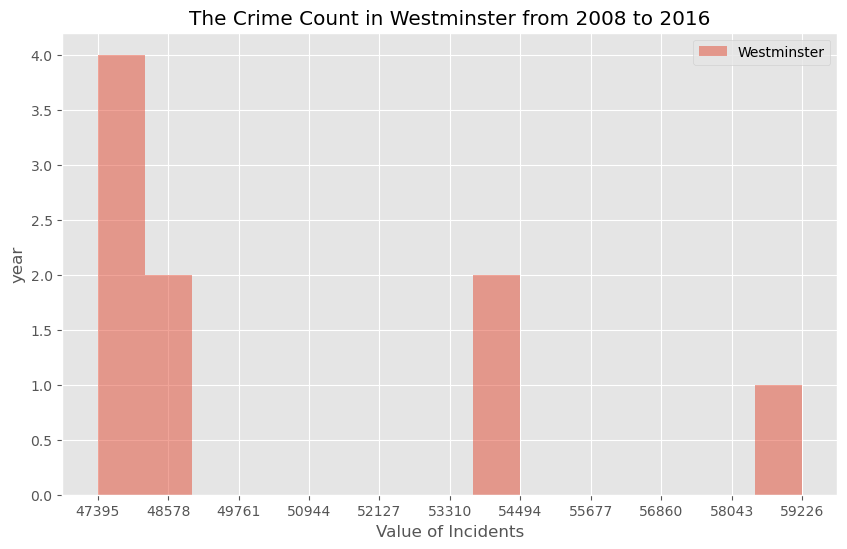

In [32]:
count, bin_edges = np.histogram(df_wm)

df_wm.plot(kind='hist',
          figsize=(10,6),
          bins=15,
          alpha=0.5,
          xticks=bin_edges,)

plt.title('The Crime Count in Westminster from 2008 to 2016')
plt.xlabel('Value of Incidents')
plt.ylabel('year')

plt.show()

Ini adalah hasil plot crime count yang terjadi di Westminster pada tahun 2008 hingga 2016

# What is the crime count in Greenwich from 2008 to 2016?

In [33]:
df_grw = df_lon[df_lon['borough'] == 'Greenwich']

cell ini berguna untuk mendefinisikan variable baru yang dimana akan mengambil value greenwich dari borough

In [34]:
df_grw

,lsoa_code,borough,major_category,minor_category,value,month
year,,,,,,
2011,E01001667,Greenwich,Theft and Handling,Other Theft Person,98,11
2012,E01001667,Greenwich,Theft and Handling,Other Theft Person,69,6
2012,E01001667,Greenwich,Theft and Handling,Other Theft Person,61,12
2009,E01001667,Greenwich,Drugs,Possession Of Drugs,42,11
2012,E01001667,Greenwich,Drugs,Possession Of Drugs,40,8
...,...,...,...,...,...,...
2013,E01033738,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,5
2013,E01001621,Greenwich,Violence Against the Person,Offensive Weapon,0,9
2013,E01001573,Greenwich,Sexual Offences,Other Sexual,0,2


In [35]:
df_grw = df_grw.groupby(['year'], sort=True)['value'].sum().reset_index()

cell ini berguna untuk menggabungkan berdasarkan kolom year dan borough serta menjumlah valuenya

In [36]:
df_grw.set_index('year', inplace=True)

In [37]:
df_grw

,value
year,
2008,22010
2009,19851
2010,18626
2011,18552
2012,20028
2013,18948
2014,19894
2015,20929
2016,22730


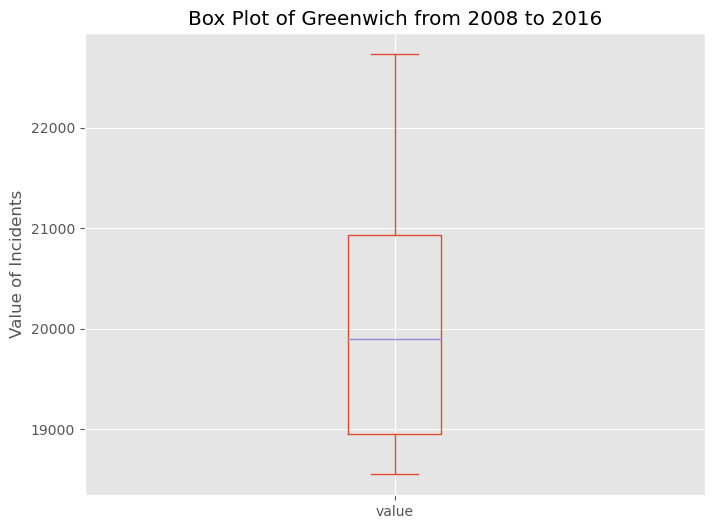

In [38]:
df_grw.plot(kind='box', figsize=(8,6))

plt.title('Box Plot of Greenwich from 2008 to 2016')
plt.ylabel('Value of Incidents')

plt.show()

In [39]:
df_grw.describe()

,value
count,9.000000
mean,20174.222222
std,1466.644365
min,18552.000000
25%,18948.000000
50%,19894.000000
75%,20929.000000
max,22730.000000


Bisa dilihat box plot sejalan dengan sintaks describe yang dimana menghitung mean,median,modus pada crime accident yang terjadi di Greenwich pada tahun 2008-2016

In [42]:
df_grw.reset_index(inplace=True)

cell ini berguna untuk me reset variable dataframe greenwich

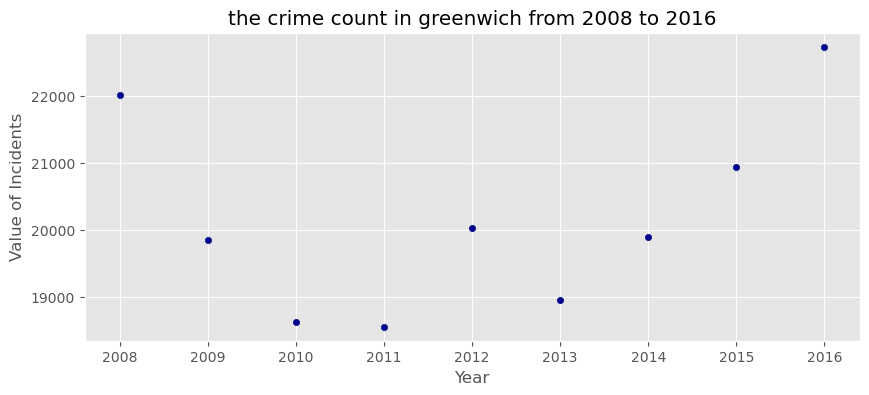

In [45]:
df_grw.plot(kind='scatter', x='year', y='value', figsize=(10,4), color='darkblue')

plt.title('the crime count in greenwich from 2008 to 2016')
plt.xlabel('Year')
plt.ylabel('Value of Incidents')

plt.show()

Ini adalah hasil Scatter Plot dari crime count di greenwich pada tahun 2008 sampai 2016

## P.s : Mohon maaf ka sebelumnya untuk visualisasi word dan folium tidak bisa dijalankan karena data yang berat untuk diproses dan device yang tidak mumpuni